### A MINIMALIST, "get-started", demonstration for the reaction `A <-> B`,
with 1st-order kinetics in both directions, taken to equilibrium.

**"No frills!"**  For advanced graphics, analysis, diagnostics, fine-tuning, etc, please see other experiments.

In [1]:
LAST_REVISED = "Aug. 19, 2024"
LIFE123_VERSION = "1.0.0.beta.38"      # Version this experiment is based on

In [2]:
#import set_path            # Using MyBinder?  Uncomment this before running the next cell!
                            # Importing this module will add the project's home directory to sys.path

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path

import life123

In [4]:
life123.check_version(LIFE123_VERSION)

OK


## Initialize the System

In [5]:
# Instantiate the simulator and specify the chemicals
dynamics = life123.UniformCompartment()  

# Reaction A <-> B , with 1st-order kinetics in both directions
dynamics.add_reaction(reactants="A", products="B", 
                      forward_rate=3., reverse_rate=2.)

dynamics.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A <-> B  (kF = 3 / kR = 2 / delta_G = -1,005.1 / K = 1.5) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'A', 'B'}


In [6]:
# Set the initial concentrations of all the chemicals
dynamics.set_conc({"A": 80., "B": 10.})

## Run the reaction

In [7]:
dynamics.single_compartment_react(initial_step=0.1, target_end_time=1.)   # Using defaults for all other parameters

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
47 total step(s) taken
Number of step re-do's because of elective soft aborts: 3
Norm usage: {'norm_A': 26, 'norm_B': 22, 'norm_C': 22, 'norm_D': 22}


In [8]:
dynamics.get_history()   # The system's history, saved during the run of single_compartment_react()

SYSTEM TIME          A          B            caption
0      0.000000  80.000000  10.000000  Initialized state
1      0.006400  78.592000  11.408000                   
2      0.009600  77.910528  12.089472                   
3      0.013440  77.105846  12.894154                   
4      0.018048  76.158767  13.841233                   
5      0.023578  75.048458  14.951542                   
6      0.029107  73.968846  16.031154                   
7      0.034637  72.919083  17.080917                   
8      0.040166  71.898344  18.101656                   
9      0.045696  70.905827  19.094173                   
10     0.052332  69.747735  20.252265                   
11     0.058967  68.628067  21.371933                   
12     0.065603  67.545546  22.454454                   
13     0.072238  66.498940  23.501060                   
14     0.078874  65.487058  24.512942                   
15     0.085509  64.508749  25.491251                   
16     0.093472  63.373726  26.626274                   
17     0.101434  62.283893  27.716107                   
18     0.109397  61.237449  28.762551                   
19     0.117360  60.232668  29.767332                   
20     0.125322  59.267889  30.732111                   
21     0.134877  58.156249  31.843751                   
22     0.144433  57.097717  32.902283                   
23     0.153988  56.089758  33.910242                   
24     0.163543  55.129955  34.870045                   
25     0.175009  54.033218  35.966782                   
26     0.186475  52.999357  37.000643                   
27     0.197941  52.024769  37.975231                   
28     0.211701  50.922312  39.077688                   
29     0.225460  49.895700  40.104300                   
30     0.239220  48.939717  41.060283                   
31     0.255731  47.871459  42.128541                   
32     0.272242  46.891393  43.108607                   
33     0.292056  45.812407  44.187593                   
34     0.311869  44.840314  45.159686                   
35     0.335646  43.789365  46.210635                   
36     0.359422  42.863355  47.136645                   
37     0.387953  41.884245  48.115755                   
38     0.422191  40.876927  49.123073                   
39     0.456429  40.042050  49.957950                   
40     0.497514  39.211704  50.788296                   
41     0.546817  38.419979  51.580021                   
42     0.605980  37.704113  52.295887                   
43     0.676975  37.099191  52.900809                   
44     0.762170  36.630965  53.369035                   
45     0.864404  36.308436  53.691564                   
46     0.987084  36.119241  53.880759                   
47     1.134300  36.031470  53.968530

## Plots changes of concentration with time  
Notice that adaptive variable time steps were automatically taken

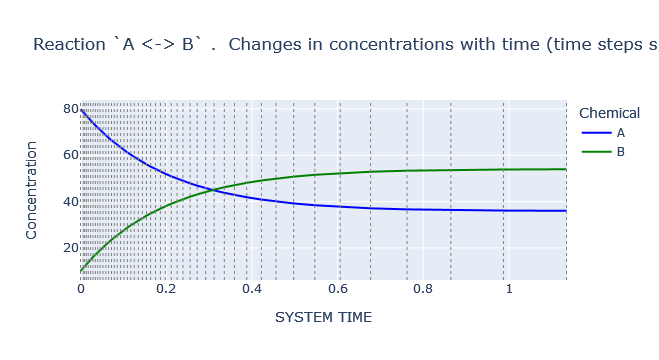

In [9]:
dynamics.plot_history(show_intervals=True)

In [10]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium()

0: A <-> B
Final concentrations: [A] = 36.03 ; [B] = 53.97
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.49782
    Formula used:  [B] / [A]
2. Ratio of forward/reverse reaction rates: 1.5
Discrepancy between the two values: 0.1456 %
Reaction IS in equilibrium (within 1% tolerance)



True